# Convnets'e giriş

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28,28,1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# input olarak convnet shape tensörü alır (image_height, image_width, image_channels).
# bizim bu örnekte (28, 28, 1)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# eğitim
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.8814 - loss: 0.3743
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.9856 - loss: 0.0470
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - accuracy: 0.9901 - loss: 0.0324
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.9929 - loss: 0.0245
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.9949 - loss: 0.0168


In [ ]:
# evaluating the convnet
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy : {test_acc:.3f}")
# ilk chapterlarda yaptığımızda %97.8 civarlarında bir başarı vardı fakat şu anda %99.2

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9881 - loss: 0.0330
Test accuracy : 0.992


# Konvolüsyon operasyonu
Önceki densely connected layer yönteminde piksel piksel bakılarak bir pattern aranıyordu. Fakat Konvolüsyon ile yerel pattern'ler bulunuyor.

2 önemli karakteristik özellik var:
1. "The patterns they learn are translation-invariant". Yani sağ altta bir pattern gördüyse bu pattern'i nerede görürse görsün tanır. Sol üstte olması, ortada olması önemli değildir. Önceki yöntemimizde bu böyle değildi, aynı pattern farklı bir yerdeyse bunu tekrardan öğrenmesi gerekiyordu. Bu büyük bir özellik çünkü artık görsel verilerimizin tamamı yerden/konumdan bağımsız.

2. "They can learn spatial hiearchies of patterns". İlk konvolüsyon katmanı koşeler gibi yerel pattern'leri öğreniyor, ikinci konvolüsyon katmanı daha büyük olan birinci katmanlarla oluşturulan daha büyük bir pattern'i öğreniyor. Böylelikle gittikçe öğrenilen pattern hiyerarşik olarak büyüyor. Görsel dünyadaki örüntüler hiyerarşik yapıdadır.



Konvolüsyon operasyonu rank-3 bir tensör üzerinden gerçekleştirilir. `Feature maps`, iki uzamsal özellik: `height (yükseklik)`, `width (genişlik)` ve derinlik ekseni `channel axis`. RGB (Red-Green-Blue) bu derinlik ekseni 3'tür, çünkü görüntüde üç farklı renk vardır. Siyah-beyaz görsellerde bu değer 1'dir.

Konvolüsyon işlemi, girişten küçük yama (patch) parçaları alır ve her yamaya aynı dönüşümü (filtreyi) uygular. Sonuç olarak `output feature map` oluşur. Bu çıktı yine üç boyutludur (yükseklik, genişlik, derinlik). Ancak artık bu çıktının derinliği RGB renkleri ile değil, filtreleri temsil eder.

Her bir filtre, giriş görüntüdeki belli bir deseni yakalamaya çalışır.
    - Bir filtre kenarları
    - Başkası köşeleri
    - Başkası yüz gibi daha karmaşık örüntüleri...


## MNIST örneğinde
- Giriş tensörü (28,28,1)
- ilk konvolüsyon katmanı, 32 filtre uygular
- her filtre, girişin üzerine kayarak (26,26) boyutunda bir çıktı üretir
- Böylece çıktı tensörü (26, 26, 32) olur.


## Feature map
Derinlik eksenindeki her bir boyut, bir özellik (feature ya da filtre) temsil eder.
Yani `output[:, :, n] şeklinde aldığın her 2D kısım, o filtrenin giriş üzerinde verdiği yanıtı gösterir.

`depth` boyutundaki her bir kanal = bir filtre = bir özellik haritası

## Konvolüsyonun 2 temel parametresi
1. Patch boyutu
    - Girişten alınan pencerenin boyutu (3x3 ya da 5x5)
2. Çıktı derinliği (output depth)
    - kaç farklı filtre uygulanacağını belirler (başlangıçta 32, sonra 64 filtre olabilir)

`Conv2D(output_depth, (window_height, window_width))`

##Konvolüsyon Nasıl Çalışır?

- (3, 3) veya (5, 5) boyutunda pencere (window) alır.

- Bu pencere, giriş tensörünün üzerinde kayarak her lokasyonda durur.

- Her lokasyonda bir 3D yama çıkarılır:

- `(window_height, window_width, input_depth)` şeklinde

- Bu yama, öğrenilmiş bir ağırlık matrisi (kernel) ile çarpılır.

- Bu kernel, bütün yamalarda aynı kalır.

- Çıktı: `output_depth` boyutlu bir vektör

- Tüm bu çıktılar, 3D bir output feature map'e birleştirilir:

- `(height, width, output_depth)`

## Çıktı Boyutu Neden Girişten Farklı Olabilir?

1. Sınır Etkileri (Border Effects):

  Görüntünün kenarında pencere tam oturamayabilir.

  Çözüm: padding="same" gibi yastıklama yapılır.

2. Stride (Adım Boyu):

  Pencerenin kaç pikselde bir kayacağını belirler.

  Örn: stride=2 → pencere her seferinde 2 piksel kayar → çıktı küçülür.


## Border effects ve padding'i anlayalım
Padding Neden Gerekli?

Eğer çıktının da girişle aynı boyutta olmasını istiyorsan, bu kaybı önlemelisin.
Bunun için:

- Girişin etrafına sıfırlarla dolu satır/sütunlar eklersin (padding).

- Böylece filtre her yerde rahatça dolaşabilir.

`Conv2D(filters=32, kernel_size=(3, 3), padding="same")`

- "valid" → padding yok → çıktı daha küçük

- "same" → gerekli padding eklenir → çıktı girişle aynı boyutta

$$
\text{Output size} = \frac{\text{Input size} - \text{Filter size}}{\text{Stride}} + 1
$$

# Konvolüsyon adımlarını (strides) anlayalım
Strides dediğimiz kavram filtrenin kaç piksel ilerleyeceğini belirtir. Varsayılan olarak 1'dir ve birer piksel olarak fırçamızı ilerletir.

Filtre daha az konumda uygulandığı için çıkış boyutu düşer.

Sınıflandırma modellerinde, feature maps'i azaltmak için strides yerine daha çok `max-pooling` kullanırız.

## Max-pooling operasyonu

- Max pooling, giriş olarak bir özellik haritası (feature map) alır. Bu, genellikle konvolüsyon katmanından çıkan veridir.

- Max pooling işlemi, bu özellik haritasını küçük pencerelere (window) böler.
- Genellikle bu pencere boyutu 2×2’dir.

- Her pencerede, penceredeki en büyük (maksimum) değer seçilir.

- Bu seçilen maksimum değer, o pencere için çıktı olur.

In [ ]:
# max-pooling katmanı olmadan hatalı bir şekilde convnet oluşturmak

inputs = keras.Input(shape=(28,28,1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_no_max_pool.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       619,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 712,202 (2.72 MB)

 Trainable params: 712,202 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

Burada iki problem var:
1. **Model çok küçük alanlara bakıyor:**  
Son katmandaki filtreler girişin sadece küçük bir parçasını (7×7 piksel) görebiliyor. Bu yüzden daha büyük, karmaşık desenleri tam öğrenemiyor.

2. **Parametre sayısı çok fazla:**  
Son konvolüsyon katmanından çıkan 22×22×128 boyutundaki veri flatten edilince, Dense katmanda yarım milyondan fazla parametre oluyor. Bu da aşırı öğrenmeye yol açıyor.


**Eğer max-pooling olsaydı:**

- Max-pooling feature map’in boyutunu örneğin 2 kat küçültür (22×22 → 11×11 gibi).
- Böylece son katmandaki çıktı daha küçük olur, parametre sayısı önemli ölçüde azalır.
- Ayrıca model, farklı seviyelerdeki özellikleri daha geniş alanlarda görebilir; yani mekânsal hiyerarşi öğrenmesi kolaylaşır.
- Sonuç olarak model daha verimli öğrenir, aşırı öğrenme riski düşer.


# Training a convnet from scratch on a small dataset:
1. küçük bir modeli sıfırdan eğit.
2. daha önceden eğitilmiş bir model ile feature extraction
3. daha önceden eğitilmiş bir model ile fine-tuning

# Veriyi indirme
kaggle'dan API İle indiriyoruz.

In [8]:
# authenticate olmak için dosya oluşturuyoruz.
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"gokhangokcen","key":"3aaa1287bd1ca904763a585ff581e30f"}'}

In [9]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:
!kaggle competitions download -c dogs-vs-cats


403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/competitions/data/download-all/dogs-vs-cats


artık veri seti kullanılamaz olduğu için microsoft'tan indirip buraya yükledik.

In [ ]:
files.upload()

Saving cats_vs_dogs_small.zip to cats_vs_dogs_small.zip
Buffered data was truncated after reaching the output size limit.

In [ ]:
!unzip -qq cats_vs_dogs_small.zip

```
import os, shutil, pathlib

# Orijinal verinin bulunduğu klasör (PetImages/ klasöründen alınan dosyaların taşındığı yer)
original_dir = pathlib.Path("train")  # Eğer "train" klasörü değilse, burayı değiştir

# Yeni küçük veri seti dizini
new_base_dir = pathlib.Path("cats_vs_dogs_small")

# Verileri alt klasörlere ayırmak için fonksiyon
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        
        for fname in fnames:
            src = original_dir / fname
            dst = dir / fname
            if src.exists():  # Dosya gerçekten var mı kontrol et (hataları önler)
                shutil.copyfile(src, dst)

# Alt kümeleri oluştur
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

```

In [ ]:
import os, shutil, pathlib

# Burada "PetImages" klasörünü belirtiyoruz
original_base_dir = pathlib.Path("PetImages")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("Cat", "Dog"):
        src_dir = original_base_dir / category
        dst_dir = new_base_dir / subset_name / category.lower()  # "cat" ve "dog" olacak
        os.makedirs(dst_dir, exist_ok=True)

        # Sadece .jpg uzantılı ve bozuk olmayan dosyaları al
        fnames = sorted([
            fname for fname in os.listdir(src_dir)
            if fname.lower().endswith(".jpg") and os.path.getsize(src_dir / fname) > 0
        ])

        selected_fnames = fnames[start_index:end_index]

        for fname in selected_fnames:
            src = src_dir / fname
            dst = dst_dir / fname
            try:
                shutil.copyfile(src, dst)
            except:
                pass

# Altsetleri oluştur
make_subset("train", 0, 1000)
make_subset("validation", 1000, 1500)
make_subset("test", 1500, 2500)


FileNotFoundError: [Errno 2] No such file or directory: 'PetImages/Cat'

artık 2000 eğitim, 1000 validation, 2000 de test görselimiz var.

# Modeli oluşturmak
Başlangıç inputu olarak 180 x 180 piksel seçiyoruz, sonrasında feature map'inin boyutunu da 77x7 seçiyoruz, Flatten katmanında önce.

Binary classification yaptığımız için son katmanda sigmoid aktivasyon fonksiyonlu bir unit olacak.

Farklı olarak, modeli Rescaling katmanı ile başlatacağız ve görselleri [0, 255] aralığından [0,1] aralığına getireceğiz.

In [11]:
from PIL import Image
import os
import tensorflow as tf

def deep_clean_images(directory):
    for category in ["cat", "dog"]:
        folder_path = os.path.join(directory, category)
        for fname in os.listdir(folder_path):
            fpath = os.path.join(folder_path, fname)

            # 1. Dosya uzantısı kontrolü
            if not (fname.lower().endswith(".jpg") or fname.lower().endswith(".jpeg")):
                print(f"❌ Yanlış uzantı → siliniyor: {fpath}")
                os.remove(fpath)
                continue

            # 2. PIL ile açılabiliyor mu?
            try:
                img = Image.open(fpath)
                img.verify()
            except Exception:
                print(f"❌ PIL hata → siliniyor: {fpath}")
                os.remove(fpath)
                continue

            # 3. TensorFlow ile decode edilebiliyor mu?
            try:
                img_data = tf.io.read_file(fpath)
                _ = tf.io.decode_jpeg(img_data)
            except:
                print(f"❌ TF decode error → siliniyor: {fpath}")
                os.remove(fpath)

# Uygula:
deep_clean_images("/content/cats_vs_dogs_small/train")
deep_clean_images("/content/cats_vs_dogs_small/validation")
deep_clean_images("/content/cats_vs_dogs_small/test")


❌ TF decode error → siliniyor: /content/cats_vs_dogs_small/train/cat/10874.jpg
❌ TF decode error → siliniyor: /content/cats_vs_dogs_small/train/cat/10404.jpg
❌ TF decode error → siliniyor: /content/cats_vs_dogs_small/train/cat/10073.jpg
❌ TF decode error → siliniyor: /content/cats_vs_dogs_small/train/dog/1017.jpg
❌ TF decode error → siliniyor: /content/cats_vs_dogs_small/train/dog/10863.jpg
❌ TF decode error → siliniyor: /content/cats_vs_dogs_small/train/dog/10383.jpg
❌ TF decode error → siliniyor: /content/cats_vs_dogs_small/train/dog/10637.jpg
❌ TF decode error → siliniyor: /content/cats_vs_dogs_small/train/dog/10678.jpg
❌ TF decode error → siliniyor: /content/cats_vs_dogs_small/train/dog/10351.jpg
❌ TF decode error → siliniyor: /content/cats_vs_dogs_small/train/dog/10733.jpg
❌ TF decode error → siliniyor: /content/cats_vs_dogs_small/train/dog/10353.jpg
❌ TF decode error → siliniyor: /content/cats_vs_dogs_small/train/dog/10705.jpg
❌ TF decode error → siliniyor: /content/cats_vs_dogs_

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs) # [0,1] aralığına aldı
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x) # 180x180'dan birer piksel kırpıldı ve 178,178,32 oldu
x = layers.MaxPooling2D(pool_size=2)(x) # yarıya düştü: 89,89,32
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x) # 87, 87, 64
x = layers.MaxPooling2D(pool_size=2)(x) # 43, 43, 64
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x) # 41, 41, 128
x = layers.MaxPooling2D(pool_size=2)(x) # 20, 20, 128
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x) # 18, 18, 256
x = layers.MaxPooling2D(pool_size=2)(x) # 9, 9, 256
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x) # 7, 7, 256
x = layers.Flatten()(x) # 12544
outputs = layers.Dense(1, activation="sigmoid")(x) # binary classification olduğu için 1
model = keras.Model(inputs=inputs, outputs=outputs)

In [13]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

```
Model: "model_2"
_________________________________________________________________
Layer (type)                     Output Shape           Param #
=================================================================
input_3 (InputLayer)             [(None, 180, 180, 3)]          0
_________________________________________________________________
rescaling (Rescaling)            (None, 180, 180, 3)            0
_________________________________________________________________
conv2d_6 (Conv2D)                (None, 178, 178, 32)         896
_________________________________________________________________
max_pooling2d_2 (MaxPooling2    (None, 89, 89, 32)              0
_________________________________________________________________
conv2d_7 (Conv2D)               (None, 87, 87, 64)          18496
_________________________________________________________________
max_pooling2d_3 (MaxPooling2    (None, 43, 43, 64)              0
_________________________________________________________________
conv2d_8 (Conv2D)               (None, 41, 41, 128)         73856
_________________________________________________________________
max_pooling2d_4 (MaxPooling2    (None, 20, 20, 128)             0
_________________________________________________________________
conv2d_9 (Conv2D)               (None, 18, 18, 256)        295168
_________________________________________________________________
max_pooling2d_5 (MaxPooling2    (None, 9, 9, 256)               0
_________________________________________________________________
conv2d_10 (Conv2D)              (None, 7, 7, 256)          590080
_________________________________________________________________
flatten_2 (Flatten)             (None, 12544)                   0
_________________________________________________________________
dense_2 (Dense)                 (None, 1)                   12545
=================================================================
Total params: 991,041
Trainable params: 991,041
Non-trainable params: 0
_______________________________________________________________

```

In [14]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Data preprocessing
Adımlar:
1. Resim dosyalarını oku
2. JPEG içeriklerini RGB piksel ızgaralarına dönüştür.
3. Bunları floating-point tensörlere çevir
4. Boyutlarını düzenle (resize) (180x180)
5. Hepsini batchlere böl (32 images)

Keras bu adımları otomatik olarak yapıyor image_dataset_from_directory().

In [15]:
# image_dataset_from_directory ile resim okuma -> görselleri tensörlere çeviriyor

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32
)


Found 1986 files belonging to 2 classes.
Found 991 files belonging to 2 classes.
Found 1987 files belonging to 2 classes.


# Veri yükleme ve işlemede tf.data.Dataset

`tf.data.Dataset`, modeli beslemenin standart yoludur.
- For döngüsü ile kullanılabilir
- fit fonksiyonuna doğrudan verilebilir.

## NumPy'den dataset oluşturmak
```
import numpy as np
import tensorflow as tf

random_numbers = np.random.normal(size=(1000,16))
dataset = tf.dataDataset.from_tensor_slices(random_numbers)
```

tek tek sample verir.
```
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

# (16,)
# (16,)
# (16,)

```

## `.batch()` - veriyi gruplamak

`batched_dataset = dataset.batch(32)`

artık for döngüsü 32'lik bloklarla çalışır.

```
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break


# (32, 16)
# (32, 16)
# (32, 16)

```


Diğer fonksiyonlar
- `.shuffle(buffer_size)` -> shuffle
- `.batch(batch_size)` -> batchlere ayır
- `.map(callable)` -> veriye dönüşüm uygular (normalization, augmentation)
- `.prefetch(buffer_size)` -> sonraki batch'i hazırlayıp RAM veya GPU'ya yükler


## `.map()` - Veri dönüştürme
`reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))`

(16,) -> (4,4)


```
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break



# (4, 4)
# (4, 4)
# (4, 4)

```

Dataset object'lerinin çıkışına bakalım. 180x180 RGB resimler (shape (32, 180, 180, 3)) ve integer labels (shape (32,0)). Her bir batch'te 32 örnek var.

In [16]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

# data batch shape: (32, 180, 180, 3)
# labels batch shape: (32, )

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [17]:
callbacks = [
    keras.callbacks.ModelCheckpoint( # her epoch'ta kaydet
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - accuracy: 0.5081 - loss: 0.8508 - val_accuracy: 0.4985 - val_loss: 0.6916
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.5133 - loss: 0.6938 - val_accuracy: 0.5822 - val_loss: 0.6812
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.5767 - loss: 0.6830 - val_accuracy: 0.5499 - val_loss: 0.8255
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6108 - loss: 0.6547 - val_accuracy: 0.5318 - val_loss: 0.6838
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.6230 - loss: 0.6370 - val_accuracy: 0.5621 - val_loss: 1.1367
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.6647 - loss: 0.6253 - val_accuracy: 0.6690 - val_loss: 0.6255
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.6888 - loss: 0.5786 - val_accuracy: 0.6458 - val_loss: 0.6371
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.7252 - loss: 0.5540 - val_accuracy: 0.7013 -

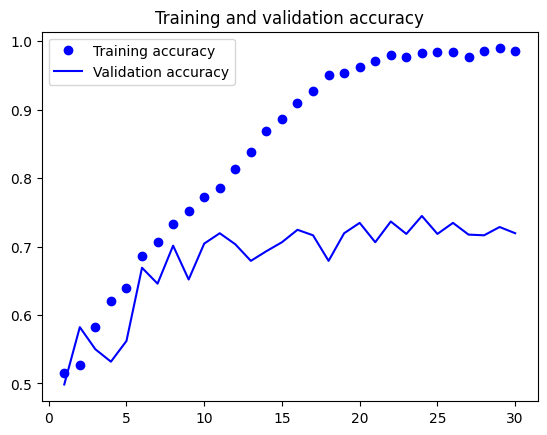

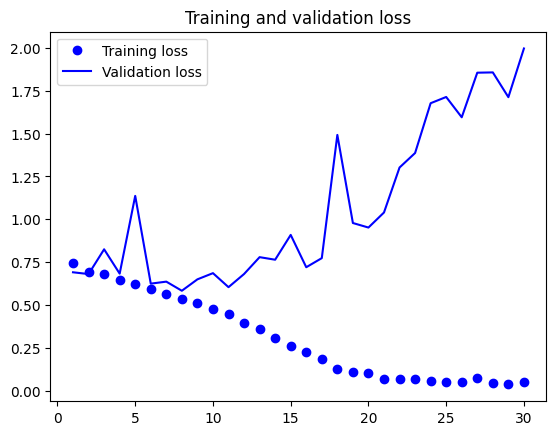

In [18]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Overfitting oluyor. 10 epoch'tan sonra aradaki fark açılmaya başlıyor. train_acc %100'e yaklaşırken, val_acc %75lerde kalıyor

In [19]:
# test veri setinde deneyelim
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6871 - loss: 0.6126
Test accuracy: 0.692


%69 doğruluk. Başlangıç için iyi. Fakat örnek sayımız çok az olduğu için (2000) overfit olmaya eğilimli. Overfitting'ten kaçmak için: droput, L2 regularization, early stopping kullanılabilir.


Bunların haricinde kullanılabilecek bir diğer teknik de `Data augmentation`.

# Data augmentation
Overfitting örnek sayısının yetersizliğinden kaynaklanıyor. Data augmentation verilerimizi çeşitlendirmeyi sağlıyor. Aynı fotoğrafı iki kere vermiyoruz fakat bazı özellikleri değişmiş eğitim fotoğraflarını tekrar verebiliriz. Böylelikle daha iyi bir genelleme yapılması sağlanabilir.

Keras'ta data augmentation katmanları eklenebilir.
- Rescaling'ten önce verilir.

In [20]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"), # %50 ihtimalle yatay çevir
        layers.RandomRotation(0.1), # +-%10  yaklaşık (36 derece döndür)
        layers.RandomZoom(0.2), # +-%20 yakınlaştır/uzaklaştır
    ]
)

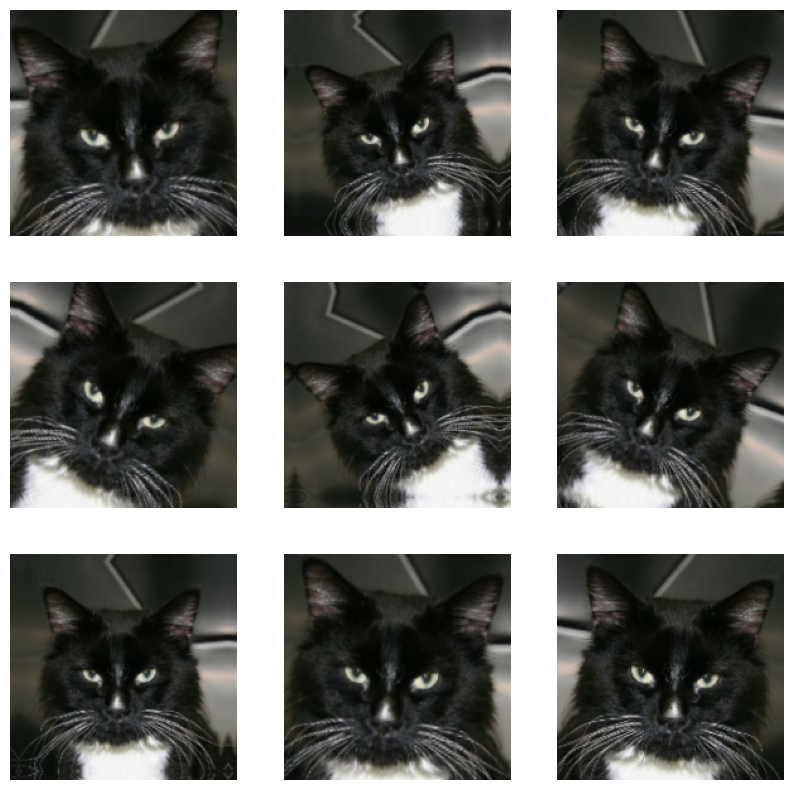

In [21]:
plt.figure(figsize=(10, 10))

for images, _ in train_dataset.take(1): # 1. örnek
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [22]:
# defining a new convnet that includes image augmentation and dropout
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [23]:
# training the regularized convnet
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.4909 - loss: 0.7205 - val_accuracy: 0.4985 - val_loss: 0.6926
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.4948 - loss: 0.7214 - val_accuracy: 0.5853 - val_loss: 0.6906
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.5336 - loss: 0.6914 - val_accuracy: 0.5126 - val_loss: 0.6869
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5514 - loss: 0.6843 - val_accuracy: 0.6418 - val_loss: 0.6609
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.6101 - loss: 0.6582 - val_accuracy: 0.4985 - val_loss: 1.0885
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.6019 - loss: 0.6928 - val_accuracy: 0.6287 - val_loss: 0.6919
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.6204 - loss: 0.6350 - val_accuracy: 0.5772 - val_loss: 0.6651
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6463 - loss: 0.6224 - val_accuracy: 0.

Artık validation %80-85 doğrulukta.

In [24]:
test_model = keras.models.load_model(
        "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8388 - loss: 0.4840
Test accuracy: 0.836


test ise %83.5 doğrulukta.

# Önceden eğitilmiş modelleri kullanma

In [25]:
# VGG16 conv. base
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [26]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

## Fast feature extraction without data augmentation

In [27]:
# extracting the vgg16 features and corresponding labels
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [28]:
train_features.shape

(1986, 5, 5, 512)

In [30]:
# defining and training the densely connected classifier
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8580 - loss: 42.2209 - val_accuracy: 0.9637 - val_loss: 6.1414
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9755 - loss: 4.2352 - val_accuracy: 0.9617 - val_loss: 7.8139
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9851 - loss: 1.5107 - val_accuracy: 0.9717 - val_loss: 5.5488
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9957 - loss: 0.4750 - val_accuracy: 0.9768 - val_loss: 6.0442
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9920 - loss: 0.9599 - val_accuracy: 0.9617 - val_loss: 7.3152
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9929 - loss: 0.7442 - val_accuracy: 0.9617 - val_loss: 7.7316
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9965 - loss: 0.3924 - val_accuracy: 0.9768 - val_loss: 6.9445
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9966 - loss: 0.2478 - val_accuracy: 0.9707 - val_los

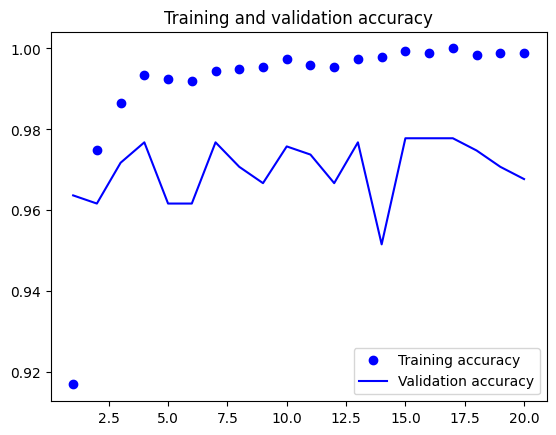

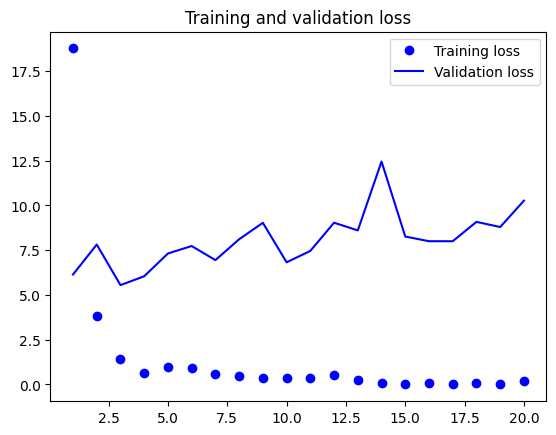

In [31]:
# sonuçların grafiği
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## Feature extraction together with data augmentation

In [32]:
# instantiating and freezing the vgg16 conv. base

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False


In [33]:
# printing the list of trainable weights before and after freezing
conv_base.trainable = True
print("This is the number of trainable weights "
        "before freezing the conv base: ", len(conv_base.trainable_weights))



This is the number of trainable weights before freezing the conv base:  26


In [34]:
conv_base.trainable = False
print("This is the number of trainable weights "
        "before freezing the conv base: ", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base:  0


In [36]:
# adding a data augmentation stage and a classifier tp the conv base

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Sadece GPU varken çalıştır çünkü çok uzun sürecek:
```
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

```

In [37]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 251ms/step - accuracy: 0.8277 - loss: 41.1209 - val_accuracy: 0.8194 - val_loss: 42.8261
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 186ms/step - accuracy: 0.9369 - loss: 8.4585 - val_accuracy: 0.9687 - val_loss: 5.3981
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.9555 - loss: 4.8518 - val_accuracy: 0.9677 - val_loss: 5.4088
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.9540 - loss: 5.2128 - val_accuracy: 0.9566 - val_loss: 9.5920
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.9589 - loss: 5.0758 - val_accuracy: 0.9687 - val_loss: 6.8069
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - accuracy: 0.9595 - loss: 5.9047 - val_accuracy: 0.9667 - val_loss: 5.9401
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.9688 - loss: 2.5343 - val_accuracy: 0.9717 - val_loss: 6.8340
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.9721 - loss: 3.1889 - val_accu

In [38]:
# sonuçların grafikleri
test_model = keras.models.load_model(
        "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9752 - loss: 3.0500
Test accuracy: 0.976


In [39]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [40]:
# freezing all layers until the fourth from the last
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
        layer.trainable = False

In [41]:
# Fine-tuning the model
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 201ms/step - accuracy: 0.9884 - loss: 0.5704 - val_accuracy: 0.9778 - val_loss: 3.3015
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 0.9860 - loss: 0.4705 - val_accuracy: 0.9798 - val_loss: 2.9784
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 149ms/step - accuracy: 0.9921 - loss: 0.2892 - val_accuracy: 0.9758 - val_loss: 3.3163
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/step - accuracy: 0.9903 - loss: 0.5128 - val_accuracy: 0.9788 - val_loss: 3.0993
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - accuracy: 0.9941 - loss: 0.1884 - val_accuracy: 0.9738 - val_loss: 3.2589
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 148ms/step - accuracy: 0.9873 - loss: 0.3313 - val_accuracy: 0.9778 - val_loss: 3.0869
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.9936 - loss: 0.3931 - val_accuracy: 0.9768 - val_loss: 2.9677
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - accuracy: 0.9911 - loss: 0.3215 - val_accu

In [42]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.9725 - loss: 3.2956
Test accuracy: 0.976


# EKSTRA

Biz vgg16 ile feature'ları öğrendik fakat bu featurelar tam olarak ne?
Nasıl bir aktivasyon haritası çıkarıyorlar bize?

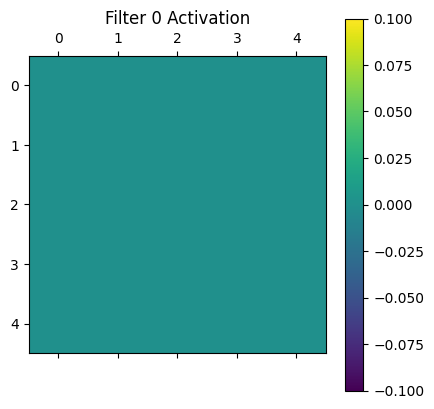

In [46]:
import matplotlib.pyplot as plt

plt.matshow(train_features[0][:, :, 0])  # İlk filtrenin aktivasyon haritası
plt.title("Filter 0 Activation")
plt.colorbar()
